In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def load_data(morphometrics, species):
    d = json.load(open(morphometrics))
    
    df = pd.DataFrame(
        {
            'length': [d[x]['dend']['length'] for x in d],
            'xydim': [max(d[x]['dend']['xdim'], d[x]['dend']['ydim']) for x in d],
            'zdim': [d[x]['dend']['zdim'] for x in d],
            'dist': [d[x]['dend']['dist'] for x in d],
            'nstem': [d[x]['dend']['nstem'] for x in d],
            'nbranch': [d[x]['dend']['nbranch'] for x in d],
            'nterm': [d[x]['dend']['nterm'] for x in d],
            'order': [d[x]['dend']['order'] for x in d],
            'breadth': [d[x]['dend']['breadth'] for x in d],
            'seclen': [d[x]['dend']['seclen'] for x in d],
            'contrac': [d[x]['dend']['contrac'] for x in d],
            'ratio': [d[x]['dend']['nterm'] / d[x]['dend']['nstem'] for x in d],
            'diam': [d[x]['dend']['diam'] for x in d],
            'cross': [max(d[x]['dend']['sholl']['crossings']) for x in d],
            'sec': [d[x]['dend']['_sec'] for x in d],
            'species': [species] * len(d)
        }
    )
    return df

In [3]:
df1 = load_data('metadata/mouse-postproc.json', 'Mouse')  # repaired
df3 = load_data('metadata/human-postproc.json', 'Human')
df = pd.concat([df1, df3], ignore_index=True)

In [4]:
Set1 = mpl.colormaps.get_cmap('Set1')
Pastel1 = mpl.colormaps.get_cmap('Pastel1')
mcolor = Set1(0.0)
hcolor = Set1(1.0/9)
mcolor_light = Pastel1(0.0)
hcolor_light = Pastel1(1.0/9)

In [5]:
def plot_violins(ax, x, y, ylabel=''):
    sns.violinplot(ax=ax, x=x, y=y, hue=x, inner='points', linewidth=0, 
                   palette='Pastel1', saturation=1, legend=False)
    ax.errorbar(x=range(len(x.unique())), 
            y=[y[x==z].median() for z in x.unique()], 
            yerr=[[abs(y[x==z].min() - y[x==z].median()) for z in x.unique()], 
                  [abs(y[x==z].max() - y[x==z].median()) for z in x.unique()]], 
            color='k', fmt='o', markersize=8, markerfacecolor='w', markeredgewidth=2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', length=0)
    ax.set_xticks(x.unique())
    ax.set_xticklabels(x.unique(), rotation=45, horizontalalignment='right')
    ax.set_xlabel('')

In [6]:
def plot_violins2(ax, x, y, ylabel=''):
    sns.violinplot(ax=ax, x=x, y=y, hue=x, inner='points', linewidth=0, 
                   palette='Pastel1', saturation=1, legend=False)
    #ax.plot(range(len(x.unique())), [y[x==z].median() for z in x.unique()], 'ko')
    ax.plot(range(len(x.unique())), [y[x==z].mean() for z in x.unique()], 'ko')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylabel(ylabel)
    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x', length=0)
    ax.set_xticks(x.unique())
    ax.set_xticklabels(x.unique(), rotation=45, horizontalalignment='right')
    ax.set_xlabel('')

In [7]:
from scipy.stats import ttest_ind

def p_stars(x, y, pvalues=[0.001, 0.01, 0.05]):
    pv = ttest_ind(x, y).pvalue
    stars = 'n/s'
    if pv < pvalues[0]:
        stars = '***'
    elif pv < pvalues[1]:
        stars = '**'
    elif pv < pvalues[2]:
        stars = '*'
    return stars

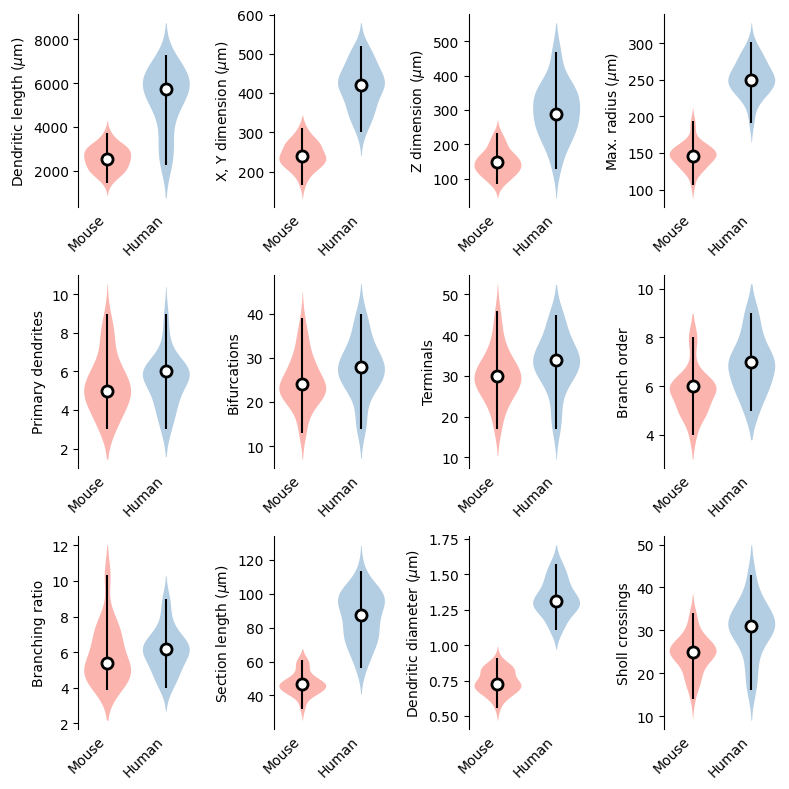

In [8]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(3, 4, 1)
plot_violins(ax, df['species'], df['length'], 'Dendritic length ($\mu$m)')

ax = fig.add_subplot(3, 4, 2)
plot_violins(ax, df['species'], df['xydim'], 'X, Y dimension ($\mu$m)')

ax = fig.add_subplot(3, 4, 3)
plot_violins(ax, df['species'], df['zdim'], 'Z dimension ($\mu$m)')

ax = fig.add_subplot(3, 4, 4)
plot_violins(ax, df['species'], df['dist'], 'Max. radius ($\mu$m)')

ax = fig.add_subplot(3, 4, 5)
plot_violins(ax, df['species'], df['nstem'], 'Primary dendrites')

ax = fig.add_subplot(3, 4, 6)
plot_violins(ax, df['species'], df['nbranch'], 'Bifurcations')

ax = fig.add_subplot(3, 4, 7)
plot_violins(ax, df['species'], df['nterm'], 'Terminals')

ax = fig.add_subplot(3, 4, 8)
plot_violins(ax, df['species'], df['order'], 'Branch order')

ax = fig.add_subplot(3, 4, 9)
plot_violins(ax, df['species'], df['ratio'], 'Branching ratio')

ax = fig.add_subplot(3, 4, 10)
plot_violins(ax, df['species'], df['seclen'], 'Section length ($\mu$m)')

ax = fig.add_subplot(3, 4, 11)
plot_violins(ax, df['species'], df['diam'], 'Dendritic diameter ($\mu$m)')

ax = fig.add_subplot(3, 4, 12)
plot_violins(ax, df['species'], df['cross'], 'Sholl crossings')

fig.tight_layout()

In [9]:
def load_sholl(morphometrics):
    d = json.load(open(morphometrics))
    sholl = dict()
    for x in d:
        radii = d[x]['dend']['sholl']['radii']
        cross = d[x]['dend']['sholl']['crossings']
        for r, c in zip(radii, cross):
            r = int(r)
            if r not in sholl:
                sholl[r] = list()
            sholl[r].append(c)
    return sholl

In [10]:
s0 = load_sholl('metadata/mouse-postproc.json')
s2 = load_sholl('metadata/human-postproc.json')
s1 = s0

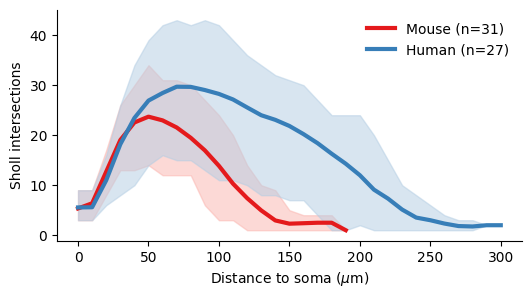

In [11]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_ylabel('Sholl intersections')
ax.set_xlabel('Distance to soma ($\mu$m)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.fill_between(s1.keys(), [np.min(s1[x]) for x in s1], [np.max(s1[x]) for x in s1], 
                color=mcolor_light, edgecolor=mcolor_light, alpha=0.5)
ax.plot(s1.keys(), [np.mean(s1[x]) for x in s1], 
        color=mcolor, lw=3, label=f"Mouse (n={len(df[df['species']=='Mouse'])})")

ax.fill_between(s2.keys(), [np.min(s2[x]) for x in s2], [np.max(s2[x]) for x in s2], 
                color=hcolor_light, edgecolor=hcolor_light, alpha=0.5)
ax.plot(s2.keys(), [np.mean(s2[x]) for x in s2], 
        color=hcolor, lw=3, label=f"Human (n={len(df[df['species']=='Human'])})")

ax.legend(frameon=False);

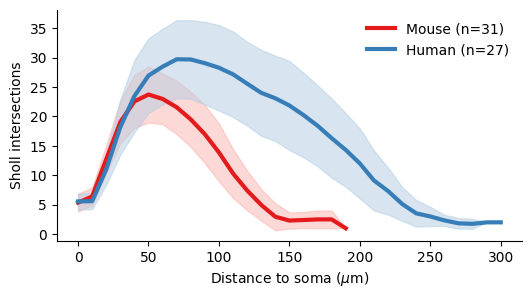

In [12]:
fig, ax = plt.subplots(figsize=(6,3))
ax.set_ylabel('Sholl intersections')
ax.set_xlabel('Distance to soma ($\mu$m)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.fill_between(s1.keys(), [np.mean(s1[x])-np.std(s1[x]) for x in s1], [np.mean(s1[x])+np.std(s1[x]) for x in s1], 
                color=mcolor_light, edgecolor=mcolor_light, alpha=0.5)
ax.plot(s1.keys(), [np.mean(s1[x]) for x in s1], 
        color=mcolor, lw=3, label=f"Mouse (n={len(df[df['species']=='Mouse'])})")

ax.fill_between(s2.keys(), [np.mean(s2[x])-np.std(s2[x]) for x in s2], [np.mean(s2[x])+np.std(s2[x]) for x in s2], 
                color=hcolor_light, edgecolor=hcolor_light, alpha=0.5)
ax.plot(s2.keys(), [np.mean(s2[x]) for x in s2], 
        color=hcolor, lw=3, label=f"Human (n={len(df[df['species']=='Human'])})")

ax.legend(frameon=False);

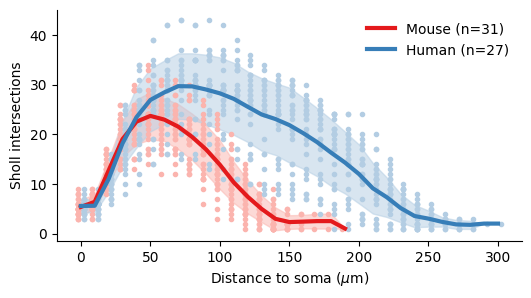

In [13]:
fig, ax = plt.subplots(figsize=(6,3))
ax.set_ylabel('Sholl intersections')
ax.set_xlabel('Distance to soma ($\mu$m)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xy1 = np.array([(x,y) for x in s1 for y in s1[x]])
xy2 = np.array([(x,y) for x in s2 for y in s2[x]])

ax.plot(xy1[:,0]-2, xy1[:,1], '.', color=mcolor_light)
ax.plot(xy2[:,0]+2, xy2[:,1], '.', color=hcolor_light)

ax.fill_between(s1.keys(), [np.mean(s1[x])-np.std(s1[x]) for x in s1], [np.mean(s1[x])+np.std(s1[x]) for x in s1], 
                color=mcolor_light, edgecolor=mcolor_light, alpha=0.5)
ax.plot(s1.keys(), [np.mean(s1[x]) for x in s1], 
        color=mcolor, lw=3, label=f"Mouse (n={len(df[df['species']=='Mouse'])})")

ax.fill_between(s2.keys(), [np.mean(s2[x])-np.std(s2[x]) for x in s2], [np.mean(s2[x])+np.std(s2[x]) for x in s2], 
                color=hcolor_light, edgecolor=hcolor_light, alpha=0.5)
ax.plot(s2.keys(), [np.mean(s2[x]) for x in s2], 
        color=hcolor, lw=3, label=f"Human (n={len(df[df['species']=='Human'])})")

ax.legend(frameon=False);

In [14]:
def sec_data(df, species):
    order= [df['sec'][i][1] for i in range(len(df['sec']))]
    breadth= [df['sec'][i][2] for i in range(len(df['sec']))]
    seclen= [df['sec'][i][3] for i in range(len(df['sec']))]

    sd = pd.DataFrame(
        {
            'order': [x for y in order for x in y],
            'breadth': [x for y in breadth for x in y],
            'seclen': [x for y in seclen for x in y]
        }
    )
    sd['species'] = [species] * len(sd['order'])
    return sd

In [15]:
sd1 = sec_data(df1, 'Mouse')
sd3 = sec_data(df3, 'Human')
sd = pd.concat([sd1, sd3], ignore_index=True)

/home/akozlov/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


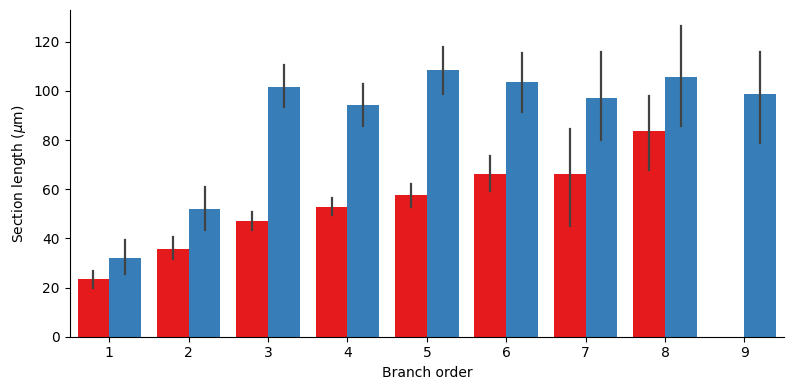

In [16]:
g = sns.catplot(x='order', y='seclen', hue='species', data=sd, 
                kind='bar', legend=False, #ci='sd',
                palette=[mcolor, hcolor], 
                saturation=1, alpha=1, capsize=0.1*0, err_kws={'linewidth': 1.6}, 
                edgecolor='w', linewidth=2,
                height=4, aspect=2)
g.set(xticklabels=[f'{x:d}' for x in range(1, int(sd['order'].max())+1)])
g.set(xlabel='Branch order')
g.set(ylabel='Section length ($\mu$m)')
plt.legend(frameon=False);

In [17]:
nsd1 = sd.where(sd['species']=='Mouse')
totlen = nsd1['seclen'].sum()
nsd1['seclen'] /= totlen

nsd2 = sd.where(sd['species']=='Human')
totlen = nsd2['seclen'].sum()
nsd2['seclen'] /= totlen

#nsd3 = sd.where(sd['species']=='repaired')
#totlen = nsd3['seclen'].sum()
#nsd3['seclen'] /= totlen

#nsd = pd.concat([nsd1, nsd2, nsd3], ignore_index=True)
nsd = pd.concat([nsd1, nsd2], ignore_index=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


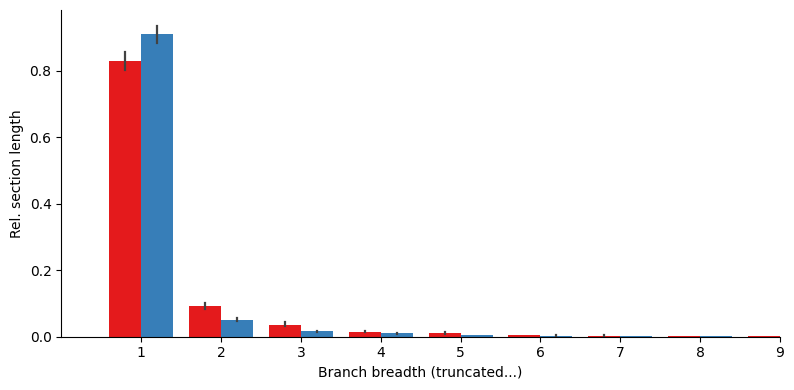

In [18]:
g = sns.catplot(x='breadth', y='seclen', hue='species', data=nsd, 
                 kind='bar', legend=False, estimator=sum, 
                 palette=[mcolor, hcolor], 
                 saturation=1, alpha=1, err_kws={'linewidth': 1.6},
                edgecolor='w', linewidth=2,
                 height=4, aspect=2)
g.set(xticks=range(0, 10), xticklabels=[f'{x:d}' for x in range(1, 11)])
g.set(xlabel='Branch breadth (truncated...)')
g.set(ylabel='Rel. section length')
g.set(xlim=[-1, 8])
plt.legend(frameon=False, loc='upper right');

/home/akozlov/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


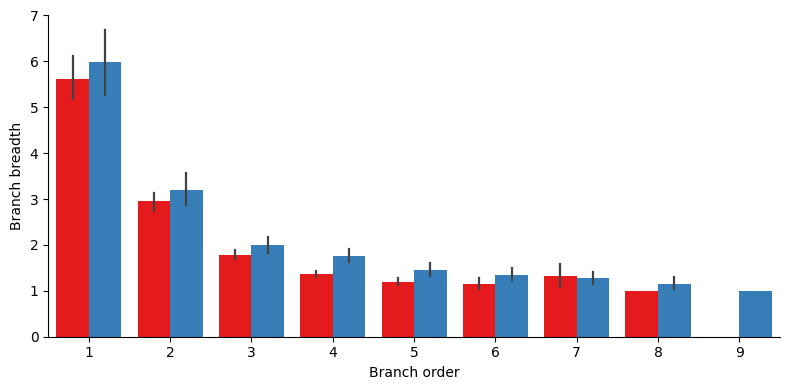

In [19]:
g = sns.catplot(x='order', y='breadth', hue='species', data=sd, 
                kind='bar', legend=False, #ci='sd',
                palette=[mcolor, hcolor], 
                saturation=1, alpha=1, capsize=0.1*0, err_kws={'linewidth': 1.6}, 
                edgecolor='w', linewidth=2,
                height=4, aspect=2)
g.set(xticklabels=[f'{x:d}' for x in range(1, int(sd['order'].max())+1)])
g.set(xlabel='Branch order')
g.set(ylabel='Branch breadth')
plt.legend(frameon=False);

In [20]:
df3c = load_data('metadata/human-corrected.json', 'Human')
df3p = load_data('metadata/human-repaired.json', 'repaired')
df4 = load_data('metadata/human-sanitized.json', 'complete')
val1 = pd.concat([df3c, df3p], ignore_index=True)
val2 = pd.concat([df4, df3p], ignore_index=True)
val1["all"] = ""
val2["all"] = ""

In [21]:
def plot_split(ax, df, hue, y, ylabel=''):
    sns.violinplot(ax=ax, x=df['all'], y=df[y], hue=df[hue], 
                   split=True, inner='quartiles', linewidth=0.01,
                   palette=[hcolor_light, hcolor], saturation=0.75)
    human = pd.Series(['Human'])
    complete = pd.Series(['complete'])
    if complete.isin(df['species']).any():
        vref = df[y][df['species']=='complete'].mean()
        vstd = df[y][df['species']=='complete'].std()
        vrep = df[y][df['species']=='repaired'].mean()
        zscore = (vrep-vref)/vstd
    else:
        vref = df[y][df['species']=='Human'].mean()
        vstd = df[y][df['species']=='Human'].std()
        vrep = df[y][df['species']=='repaired'].mean()
        zscore = (vrep-vref)/vstd
    ax.text(0.9, 0.9, f'{zscore:.2f}', transform=ax.transAxes, 
            fontsize=14, weight='bold', color=hcolor)
    plt.legend([],[], frameon=False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', length=0)
    ax.set_xlabel('')

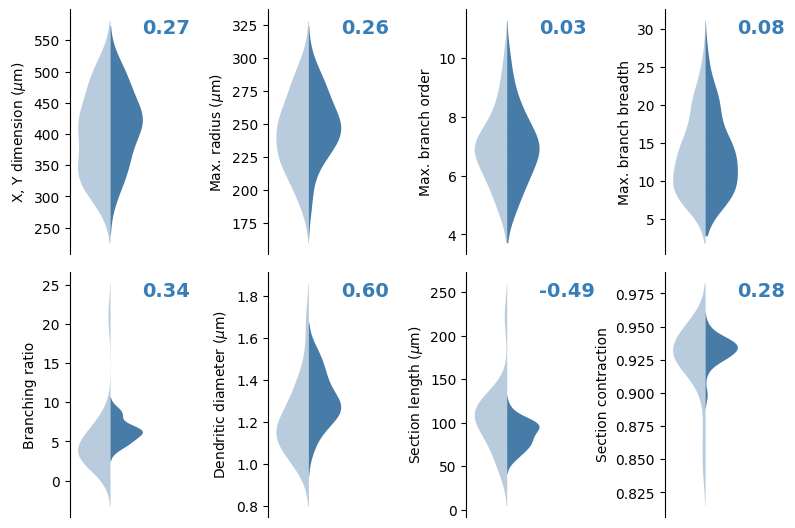

In [22]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(3, 4, 1)
plot_split(ax, val1, 'species', 'xydim', 'X, Y dimension ($\mu$m)')

ax = fig.add_subplot(3, 4, 2)
plot_split(ax, val1, 'species', 'dist', 'Max. radius ($\mu$m)')

ax = fig.add_subplot(3, 4, 3)
plot_split(ax, val1, 'species', 'order', 'Max. branch order')

ax = fig.add_subplot(3, 4, 4)
plot_split(ax, val1, 'species', 'breadth', 'Max. branch breadth')

ax = fig.add_subplot(3, 4, 5)
#plot_split(ax, val1, 'species', 'ratio', 'Branching ratio')
plot_split(ax, val2, 'species', 'ratio', 'Branching ratio')

ax = fig.add_subplot(3, 4, 6)
plot_split(ax, val2, 'species', 'diam', 'Dendritic diameter ($\mu$m)')

ax = fig.add_subplot(3, 4, 7)
plot_split(ax, val2, 'species', 'seclen', 'Section length ($\mu$m)')

ax = fig.add_subplot(3, 4, 8)
plot_split(ax, val2, 'species', 'contrac', 'Section contraction')

fig.tight_layout()

In [23]:
mdf3c = load_data('metadata/mouse-corrected.json', 'Mouse')
mdf3p = load_data('metadata/mouse-repaired.json', 'repaired')
mdf4 = load_data('metadata/mouse-sanitized.json', 'complete')
mval1 = pd.concat([mdf3c, mdf3p], ignore_index=True)
mval2 = pd.concat([mdf4, mdf3p], ignore_index=True)
mval1["all"] = ""
mval2["all"] = ""

In [24]:
def plot_msplit(ax, df, hue, y, ylabel=''):
    sns.violinplot(ax=ax, x=df['all'], y=df[y], hue=df[hue], 
                   split=True, inner='quartiles', linewidth=0.01,
                   palette=[mcolor_light, mcolor], saturation=0.75)
    mouse = pd.Series(['Mouse'])
    complete = pd.Series(['complete'])
    if complete.isin(df['species']).any():
        vref = df[y][df['species']=='complete'].mean()
        vstd = df[y][df['species']=='complete'].std()
        vrep = df[y][df['species']=='repaired'].mean()
        zscore = (vrep-vref)/vstd
    else:
        vref = df[y][df['species']=='Mouse'].mean()
        vstd = df[y][df['species']=='Mouse'].std()
        vrep = df[y][df['species']=='repaired'].mean()
        zscore = (vrep-vref)/vstd
    ax.text(0.9, 0.9, f'{zscore:.2f}', transform=ax.transAxes, 
            fontsize=14, weight='bold', color=mcolor)
    plt.legend([],[], frameon=False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', length=0)
    ax.set_xlabel('')

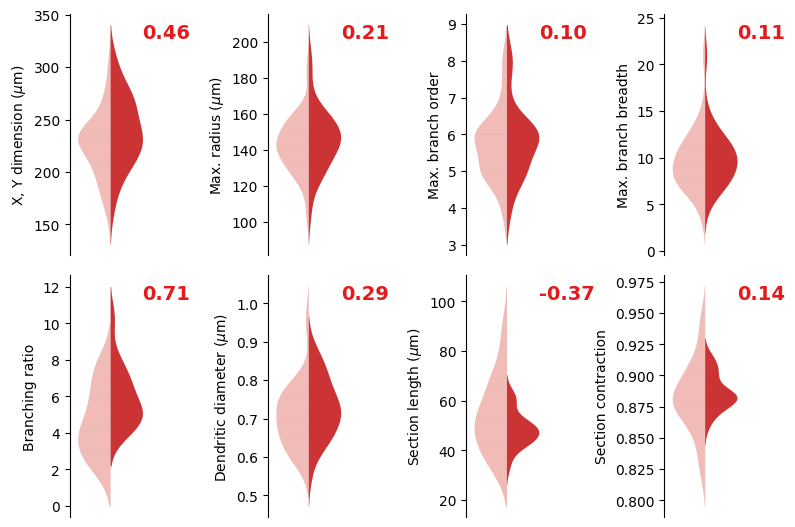

In [25]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(3, 4, 1)
plot_msplit(ax, mval1, 'species', 'xydim', 'X, Y dimension ($\mu$m)')

ax = fig.add_subplot(3, 4, 2)
plot_msplit(ax, mval1, 'species', 'dist', 'Max. radius ($\mu$m)')

ax = fig.add_subplot(3, 4, 3)
plot_msplit(ax, mval1, 'species', 'order', 'Max. branch order')

ax = fig.add_subplot(3, 4, 4)
plot_msplit(ax, mval1, 'species', 'breadth', 'Max. branch breadth')

ax = fig.add_subplot(3, 4, 5)
#plot_msplit(ax, mval1, 'species', 'ratio', 'Branching ratio')
plot_msplit(ax, mval2, 'species', 'ratio', 'Branching ratio')

ax = fig.add_subplot(3, 4, 6)
plot_msplit(ax, mval2, 'species', 'diam', 'Dendritic diameter ($\mu$m)')

ax = fig.add_subplot(3, 4, 7)
plot_msplit(ax, mval2, 'species', 'seclen', 'Section length ($\mu$m)')

ax = fig.add_subplot(3, 4, 8)
plot_msplit(ax, mval2, 'species', 'contrac', 'Section contraction')

fig.tight_layout();

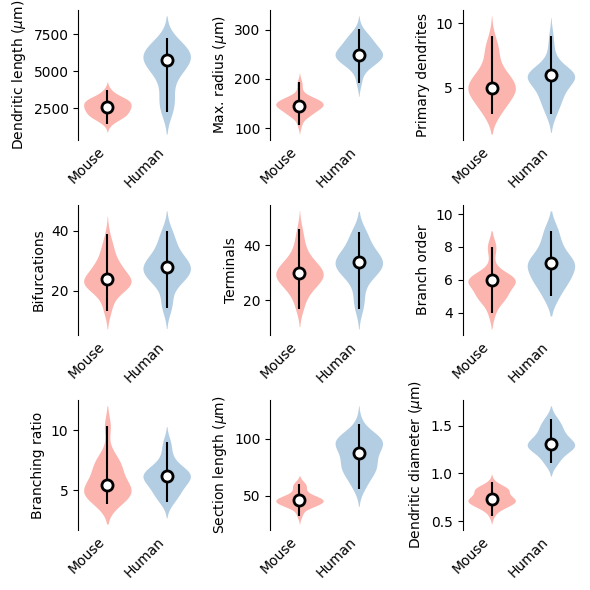

In [26]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(3, 3, 1)
plot_violins(ax, df['species'], df['length'], 'Dendritic length ($\mu$m)')

ax = fig.add_subplot(3, 3, 2)
plot_violins(ax, df['species'], df['dist'], 'Max. radius ($\mu$m)')

ax = fig.add_subplot(3, 3, 3)
plot_violins(ax, df['species'], df['nstem'], 'Primary dendrites')

ax = fig.add_subplot(3, 3, 4)
plot_violins(ax, df['species'], df['nbranch'], 'Bifurcations')

ax = fig.add_subplot(3, 3, 5)
plot_violins(ax, df['species'], df['nterm'], 'Terminals')

ax = fig.add_subplot(3, 3, 6)
plot_violins(ax, df['species'], df['order'], 'Branch order')

ax = fig.add_subplot(3, 3, 7)
plot_violins(ax, df['species'], df['ratio'], 'Branching ratio')

ax = fig.add_subplot(3, 3, 8)
plot_violins(ax, df['species'], df['seclen'], 'Section length ($\mu$m)')

ax = fig.add_subplot(3, 3, 9)
plot_violins(ax, df['species'], df['diam'], 'Dendritic diameter ($\mu$m)')

fig.tight_layout()

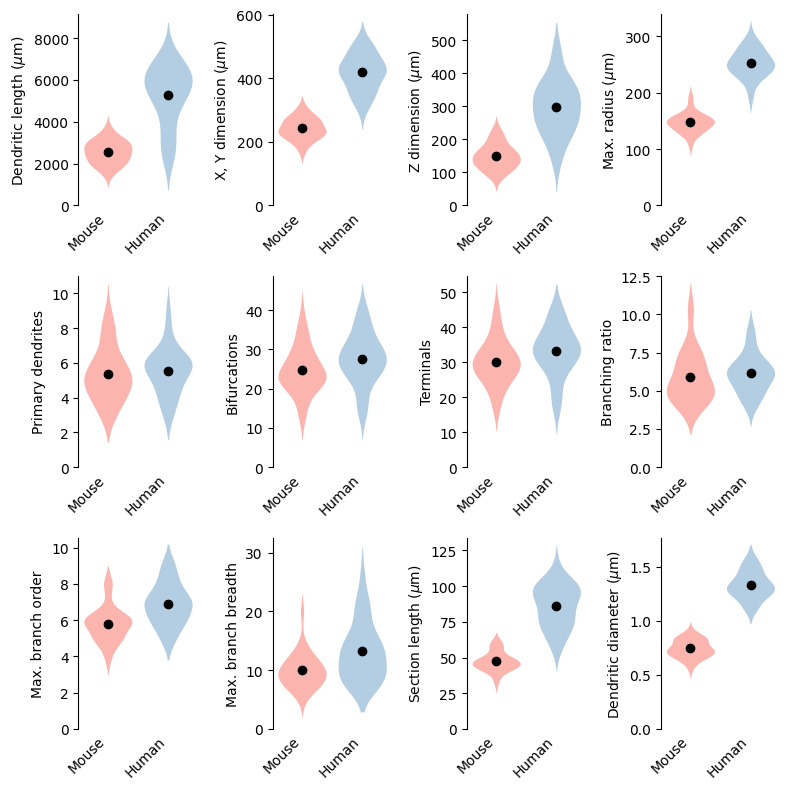

In [27]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(3, 4, 1)
plot_violins2(ax, df['species'], df['length'], 'Dendritic length ($\mu$m)')

ax = fig.add_subplot(3, 4, 2)
plot_violins2(ax, df['species'], df['xydim'], 'X, Y dimension ($\mu$m)')

ax = fig.add_subplot(3, 4, 3)
plot_violins2(ax, df['species'], df['zdim'], 'Z dimension ($\mu$m)')

ax = fig.add_subplot(3, 4, 4)
plot_violins2(ax, df['species'], df['dist'], 'Max. radius ($\mu$m)')

ax = fig.add_subplot(3, 4, 5)
plot_violins2(ax, df['species'], df['nstem'], 'Primary dendrites')

ax = fig.add_subplot(3, 4, 6)
plot_violins2(ax, df['species'], df['nbranch'], 'Bifurcations')

ax = fig.add_subplot(3, 4, 7)
plot_violins2(ax, df['species'], df['nterm'], 'Terminals')

ax = fig.add_subplot(3, 4, 8)
plot_violins2(ax, df['species'], df['ratio'], 'Branching ratio')

ax = fig.add_subplot(3, 4, 9)
plot_violins2(ax, df['species'], df['order'], 'Max. branch order')

ax = fig.add_subplot(3, 4, 10)
plot_violins2(ax, df['species'], df['breadth'], 'Max. branch breadth')

ax = fig.add_subplot(3, 4, 11)
plot_violins2(ax, df['species'], df['seclen'], 'Section length ($\mu$m)')

ax = fig.add_subplot(3, 4, 12)
plot_violins2(ax, df['species'], df['diam'], 'Dendritic diameter ($\mu$m)')

fig.tight_layout()

In [28]:
msel = df['species']=='Mouse'
hsel = df['species']=='Human'
(df[msel]['nstem'].mean(), df[hsel]['nstem'].mean()), (df[msel]['nterm'].mean(), df[hsel]['nterm'].mean())

((5.354838709677419, 5.555555555555555),
 (30.129032258064516, 33.22222222222222))

In [29]:
mdf3c['nstem'].mean(), mdf3c['nstem'].min(), mdf3c['nstem'].max(), len(mdf3c)

(5.32258064516129, 3, 8, 31)

In [30]:
df3c['nstem'].mean(), df3c['nstem'].min(), df3c['nstem'].max(), len(df3c)

(5.444444444444445, 3, 9, 27)

In [35]:
np.median(mdf3c['nstem']), np.median(df3c['nstem']), p_stars(mdf3c['nstem'], df3c['nstem'])

(5.0, 6.0, 'n/s')

In [32]:
mcross = df1['cross']
hcross = df3['cross']
mcross.mean(), hcross.mean(), p_stars(mcross, hcross)

(24.548387096774192, 30.51851851851852, '***')

In [33]:
def reject_outliers(d, m=2):
    data = np.array(d) if not isinstance(d, np.ndarray) else d
    return data[abs(data - np.median(data)) < m * np.std(data)]

In [34]:
mcross2 = reject_outliers(mcross)
hcross2 = reject_outliers(hcross)
mcross2.mean(), hcross2.mean(), p_stars(mcross2, hcross2)

(24.586206896551722, 31.64, '***')